#                                                       ML Exam Q1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import model_selection, linear_model
from sklearn.metrics import mean_squared_error
%matplotlib inline
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.grid_search import GridSearchCV
from sklearn.decomposition import PCA

C:\Users\jagpa\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\jagpa\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
data = pd.read_csv("C:/Users/jagpa/ML/ML_Exam/Regression/regression_data.csv", index_col = False)
data = data.drop(['id','zipcode','date'],axis=1)

# Summary statistics of data

In [3]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


**Separating data into Features (X) and Target (y)**

In [6]:
X = data.drop(['price'],axis=1)
y = data['price']

In [7]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
5,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930
6,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819
7,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,47.4095,-122.315,1650,9711
8,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,47.5123,-122.337,1780,8113
9,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,47.3684,-122.031,2390,7570


In [8]:
y

0         221900.0
1         538000.0
2         180000.0
3         604000.0
4         510000.0
5        1225000.0
6         257500.0
7         291850.0
8         229500.0
9         323000.0
10        662500.0
11        468000.0
12        310000.0
13        400000.0
14        530000.0
15        650000.0
16        395000.0
17        485000.0
18        189000.0
19        230000.0
20        385000.0
21       2000000.0
22        285000.0
23        252700.0
24        329000.0
25        233000.0
26        937000.0
27        667000.0
28        438000.0
29        719000.0
           ...    
21583     399950.0
21584     380000.0
21585     270000.0
21586     505000.0
21587     385000.0
21588     414500.0
21589     347500.0
21590    1222500.0
21591     572000.0
21592     475000.0
21593    1088000.0
21594     350000.0
21595     520000.0
21596     679950.0
21597    1575000.0
21598     541800.0
21599     810000.0
21600    1537000.0
21601     467000.0
21602     224000.0
21603     507250.0
21604     42

**Scatter plot of two attributes - price and sqft_living**

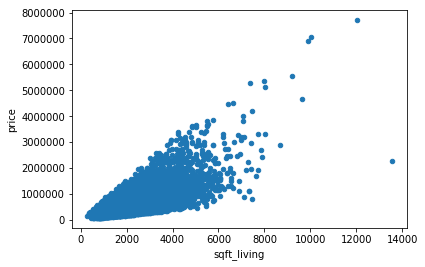

In [9]:
q = pd.concat([data['price'], data['sqft_living']], axis =1)
q.plot.scatter(x = 'sqft_living', y = 'price')

# Correlation Matrix

correlation values between attribute columns are shown belown in Correlation Matrix.

In [10]:
cor_matrix = data.corr()
cor_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.114084,0.198372,0.713202,0.119248


# Normalization

This method is a part of data preprocessing and is used to standardized the range of independent variables or features of data. In my dataset there are many attributes which are making it difficult to fit the model on train dataset.I'm scaling some attribues such as price, sqft_living, sqft_lot, sqft_living15, sqft_lot15 to make the data fit and work properly.

In [11]:
#Normalization of some attributes
data['price']=preprocessing.scale(data['price'])
data['sqft_living']=preprocessing.scale(data['sqft_living'])
data['sqft_lot']=preprocessing.scale(data['sqft_lot'])
data['sqft_living15']=preprocessing.scale(data['sqft_living15'])
data['sqft_lot15']=preprocessing.scale(data['sqft_lot15'])

# Plotting Normalized Data

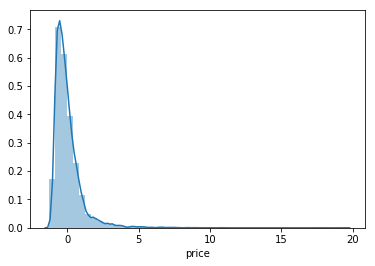

In [12]:
sns.distplot(data['price'])

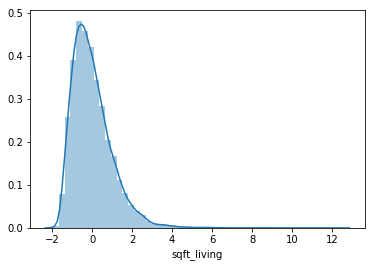

In [13]:
sns.distplot(data['sqft_living'])

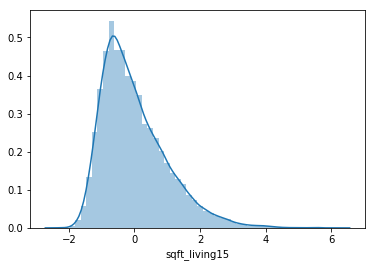

In [14]:
sns.distplot(data['sqft_living15'])

# Plotting all the attributes

Principal Component Analysis (PCA) does the analysis of data to identify patterns and finding patterns to reduce the dimensions of thedataset with  minimal loss of information. Here I'm using PCA to covert attributes into 2-dimensions and plot all of them.

**Scatter Plot**

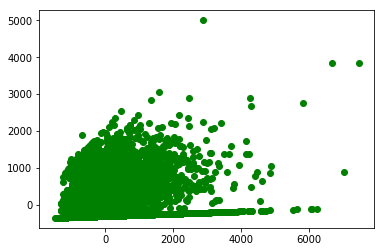

In [15]:
cmp_pca = PCA(n_components=2) # 2 PCA components;
arr_pca = cmp_pca.fit_transform(data)

plt.scatter(arr_pca[:,0],arr_pca[:,1],c='G')
plt.show()

**Histogram**

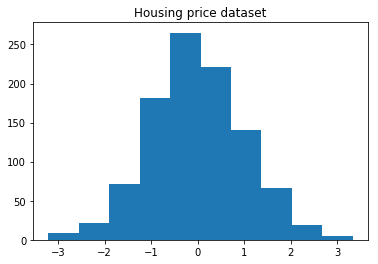

In [16]:
from numpy.random import normal
arr_pca = normal(size=1000)
plt.hist(arr_pca)
plt.title("Housing price dataset")
plt.show()

# Train-Test Split

I'm splitting dataset into training and testing set by 80% i.e. 80% train set and 20% test set. Training set contains a known output and model learns on trained data in order to be generalized to other data. 

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)
print('Shape of training data')
print(X_train.shape)
print('Shape of testing data')
print(X_test.shape)

Shape of training data
(17290, 17)
Shape of testing data
(4323, 17)


# Ordinary Least Square

Ordinary Least Squares (OLS) is one of the simplest methods of linear regression. The goal of OLS is to closely "fit" a function with the data. It does so by minimizing the sum of squared errors from the data.

In [18]:
ordinary_least_sq = linear_model.LinearRegression(normalize=True)
ordinary_least_sq.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [19]:
y_pred = ordinary_least_sq.predict(X_test)
y_pred

array([ 0.30398269, -0.29134734,  0.55686664, ..., -0.58557642,
        2.26400994, -0.49826048])

In [20]:
R_sq = r2_score(y_true=y_test,y_pred=y_pred)
print('R^2 error :')
print(R_sq)

R^2 error :
0.681058212627


In [21]:
mean_sq = mean_squared_error(y_true=y_test, y_pred=y_pred)
print('Mean squared erroe :')
print(mean_sq)

Mean squared erroe :
0.408452574067


# Lasso Regression

In machine learning, lasso is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the model it produces.

In [22]:
alpha=[0.001, 0.01, 0.1, 1, 2]
for i in range(5):
    lassoreg = linear_model.Lasso(alpha[i])
    lassoreg.fit(X_train,y_train)
    y_pred = lassoreg.predict(X_test)
    print('y_pred :',y_pred)
    print('R^2 error for',alpha[i])
    print(r2_score(y_true=y_test, y_pred=y_pred))
    lassoreg_mean_sq = mean_squared_error(y_true=y_test, y_pred=y_pred)
    print('Mean squared error for ',alpha[i])
    print(lassoreg_mean_sq)
    print('\n')

y_pred : [ 0.31164172 -0.30329741  0.57506674 ..., -0.57885326  2.27485374
 -0.48916852]
R^2 error for 0.001
0.680000755666
Mean squared error for  0.001
0.409806805575


y_pred : [ 0.37752712 -0.39907457  0.66508518 ..., -0.47371289  2.40302864
 -0.49133896]
R^2 error for 0.01
0.657046796463
Mean squared error for  0.01
0.439202777168


y_pred : [ 0.55634936 -0.54355681  0.51440352 ..., -0.26122372  2.63394815
 -0.58117651]
R^2 error for 0.1
0.585355619015
Mean squared error for  0.1
0.531014032783


y_pred : [ 0.55345098 -0.47026605  0.21682221 ..., -0.31869197  2.73292777 -0.51223   ]
R^2 error for 1
0.545431405636
Mean squared error for  1
0.582142948364


y_pred : [ 0.56812655 -0.43774676  0.24127224 ..., -0.30203154  2.73096946
 -0.48923992]
R^2 error for 2
0.53994277613
Mean squared error for  2
0.589171957853




# Kernalized Ridge Regression

We use plain Ridge Regression to minimize L2-regularized least-square error. Kernelized Ridge Regression has the same objective, but use a substitution to rewrite the function in terms of ΦΦᵀ, so that predictions can be made without needing to compute ΦΦᵀ directly. A few choices for the kernel are

(a)Linear / Identity Kernel : K(X,X’) = Xᵀ X

(b)Polynomial Kernel : K(X,X’) = (γ Xᵀ X + r)M 

(c)RBF / Gaussian Kernel : K(X,X’) = exp [ - (|| X - X’ ||2) / 2σ2 ]

**Cross-Validation** : It is a model validation technique for evaluating how the outcomes of a statistical analysis will generalize to an independent data set. Mainly used in backgrounds where the objective is forecast and one wants to estimate how accurately a model will accomplish in practice. The goal of cross-validation is to term a data set to test the model in the training phase (i.e. validation data set) in order to limit problems like overfitting, and get an insight on how the model will generalize to an independent data set.

**GridSearchCV** : Scikit-learn’s GridSearchCV performs k-fold cross validation and searches for a best parameters across a set of parameters. Here I'm using 5-fold cross validation for hyperparameter tuning.

**Linear Kernel**

In [23]:
KRR_linear=KernelRidge(kernel='linear', gamma=None, degree=None, coef0=1, kernel_params=None, alpha=1)
KRR_linear.fit(X_train,y_train)

KernelRidge(alpha=1, coef0=1, degree=None, gamma=None, kernel='linear',
      kernel_params=None)

In [24]:
y_pred=KRR_linear.predict(X_test)
y_pred

array([ 0.33921242, -0.36561394,  0.74279785, ..., -0.62039375,
        2.19903564, -0.36985016])

In [25]:
linear_r2 = r2_score(y_true=y_test,y_pred=y_pred)
print('R^2 Error for linear kernel : ',linear_r2)

R^2 Error for linear kernel :  0.675278865644


In [26]:
linear_mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
print('MSE for linear kernel :',linear_mse)

MSE for linear kernel : 0.415853890686


**Polynomial Kernel**

In [27]:
KRR_polynomial= GridSearchCV(KernelRidge(kernel="polynomial", gamma=1, coef0=1), cv=5, param_grid={"degree":[2,4,7]})
KRR_polynomial.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=1, kernel='polynomial',
      kernel_params=None),
       fit_params={}, iid=True, n_jobs=1, param_grid={'degree': [2, 4, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [28]:
y_pred=KRR_polynomial.predict(X_test)
y_pred

array([  1.42167251e+44,   1.44954844e+44,   1.78405962e+46, ...,
         1.26835488e+44,   5.85394561e+44,   5.68669003e+44])

In [29]:
poly_r2 = r2_score(y_true=y_test,y_pred=y_pred)
print('R^2 Error for polynomial kernel : ',poly_r2)

R^2 Error for polynomial kernel :  -1.73830701453e+92


In [30]:
poly_mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
print('MSE for polynomial kernel :',poly_mse)

MSE for polynomial kernel : 2.22616164678e+92


In [31]:
KRR_polynomial.best_score_

-1.920348363682337e+93

In [32]:
KRR_polynomial.best_params_

{'degree': 2}

**Gaussian Kernel**

In [33]:
KRR_gaussian= GridSearchCV(KernelRidge(kernel="rbf"), cv=5, param_grid={"alpha": [0.1, 0.01, 0.001], "gamma":[0.1, 0.5, 1, 2, 4]})
KRR_gaussian.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='rbf',
      kernel_params=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 0.01, 0.001], 'gamma': [0.1, 0.5, 1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [34]:
y_pred=KRR_gaussian.predict(X_test)
y_pred

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [35]:
gaussian_r2 = r2_score(y_true=y_test,y_pred=y_pred)
print('R^2 Error for gaussian kernel : ',gaussian_r2)

R^2 Error for gaussian kernel :  0.00405795002695


In [36]:
gaussian_mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
print('MSE for gaussian kernel :',gaussian_mse)

MSE for gaussian kernel : 1.27545248079


In [37]:
KRR_gaussian.best_score_

0.009198813731864064

In [38]:
KRR_gaussian.best_params_

{'alpha': 0.1, 'gamma': 0.1}

# RESULTS 

Performance measures of all the models given below :

Ordinary Least Square : 0.681058212627

Lasso Regression : 0.680000755666 for 0.001

Kernalized Ridge Regression 

Linear Kernel :  0.675278865644, Polynomial Kernel : -1.73830701453e+92 , Gaussian Kernel : 0.009198813731864064


**Ordinary Least Square gives best performance for the data amongst all other models**